MNIST Handwritten Digits Classification using CNN

In [41]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

In [42]:
# Getting the data into training and testing variables.
from tensorflow.keras.datasets import mnist

# Load dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalize images (scale pixel values to range 0-1)
x_train = x_train / 255.0
x_test = x_test / 255.0

# Reshape images to fit CNN input (batch_size, 28, 28, 1)
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)

# Check the new shape
print("Training the data shape:", x_train.shape)
print("Testing the data shape:", x_test.shape)

Training the data shape: (60000, 28, 28, 1)
Testing the data shape: (10000, 28, 28, 1)


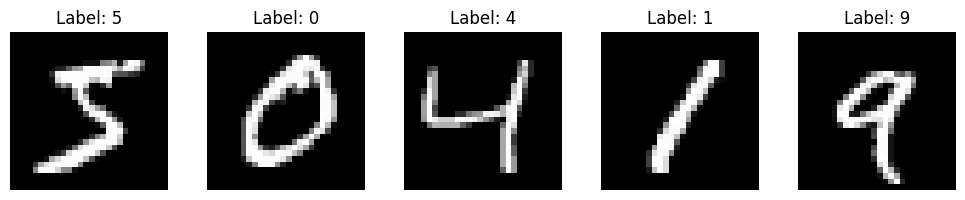

In [43]:
# Visualizing sample images
import matplotlib.pyplot as plt

# Plot 5 sample images from the training set
plt.figure(figsize=(10,2))

for i in range(5):
  plt.subplot(1,5,i+1) # 1 row, 5 columns
  plt.imshow(x_train[i].reshape(28,28), cmap='gray') # remove the channel dimension
  plt.title(f"Label: {y_train[i]}")
  plt.axis('off')

# Show the plot
plt.tight_layout()
plt.show()

In [44]:
# Building the CNN Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# Defining the CNN structure
model = Sequential([
    # 1st Convolutional layer
    Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D(pool_size=(2, 2)),

    # 2nd Convolutional layer
    Conv2D(64, kernel_size=(3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),

    # Flatten and Dense layers
    Flatten(),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax') # Output classes
])

In [45]:
model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_11 (Conv2D)              │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_11 (MaxPooling2D) │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_12 (Conv2D)              │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_12 (MaxPooling2D) │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_5 (Flatten)             │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 64)             │       102,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 121,930 (476.29 KB)

 Trainable params: 121,930 (476.29 KB)

 Non-trainable params: 0 (0.00 B)

In [46]:
# Compile the model
model.compile(
    optimizer='adam', # how the model updates it's weight
    loss='sparse_categorical_crossentropy', # works for integers labeels like (0-9)
    metrics=['accuracy'] # track how many predictions were correct
)

In [47]:
from re import VERBOSE
# Training the model
history = model.fit(
    x_train, y_train, # training data
    epochs=5, # number of training passes
    batch_size=32, # number of images the model sees at once
    validation_split=0.2, # 20% of the training data is used for validation
    verbose=1 # training progress
)

Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 50s 32ms/step - accuracy: 0.8785 - loss: 0.3901 - val_accuracy: 0.9805 - val_loss: 0.0641
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 45s 30ms/step - accuracy: 0.9840 - loss: 0.0525 - val_accuracy: 0.9871 - val_loss: 0.0455
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 86s 33ms/step - accuracy: 0.9890 - loss: 0.0345 - val_accuracy: 0.9862 - val_loss: 0.0497
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 80s 31ms/step - accuracy: 0.9919 - loss: 0.0257 - val_accuracy: 0.9868 - val_loss: 0.0448
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 83s 32ms/step - accuracy: 0.9936 - loss: 0.0198 - val_accuracy: 0.9872 - val_loss: 0.0448


In [48]:
# Evaluate the model on the test dataset
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f'\nTest accuracy: {test_accuracy * 100:.2f}%')

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.9843 - loss: 0.0469

Test accuracy: 98.77%


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


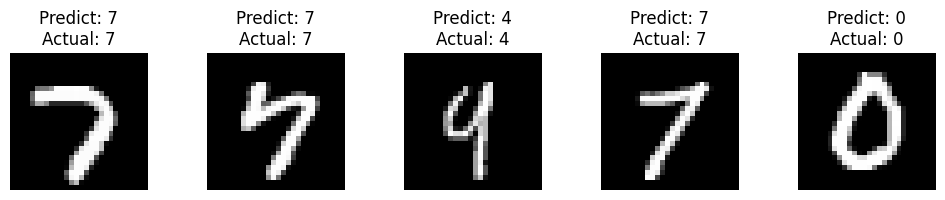

In [49]:
# Predict & Visualize 5 Test Images
import random

plt.figure(figsize=(10, 2))

for i in range(5):
  index = random.randint(0, len(x_test)-1)
  image = x_test[index]
  label = y_test[index]

  # Predict (model expects batch of images, so we add an extra dimension)
  prediction = model.predict(image.reshape(1, 28, 28, 1))
  predicted_label = np.argmax(prediction)

  # Plot the image
  plt.subplot(1, 5, i+1)
  plt.imshow(image.reshape(28, 28), cmap='gray')
  plt.title(f"Predict: {predicted_label}\nActual: {label}")
  plt.axis('off')

plt.tight_layout()
plt.show()


In [50]:
model.save('my_model.keras')